In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy

In [126]:
df = pd.read_csv('carmileage.csv')
Y = np.sqrt(df['MPG'])
#X = scipy.stats.boxcox(df['HP'].to_list())[0]
X = df['HP']
df.tail()

,MAKEMODEL,VOL,HP,MPG,SP,WT
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0
81,Rolls-RoyceVarious,107,236,13.2,130,55.0


In [127]:
# Using statsmodels
results = sm.OLS(Y, sm.add_constant(X)).fit(cov_type = "HC1")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     75.03
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           4.05e-13
Time:                        15:53:23   Log-Likelihood:                -55.774
No. Observations:                  82   AIC:                             115.5
Df Residuals:                      80   BIC:                             120.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2125      0.171     42.210      0.0

**P value < 0.05. Hence as per Wald's test, we can reject the null hypothesis that there is no association**

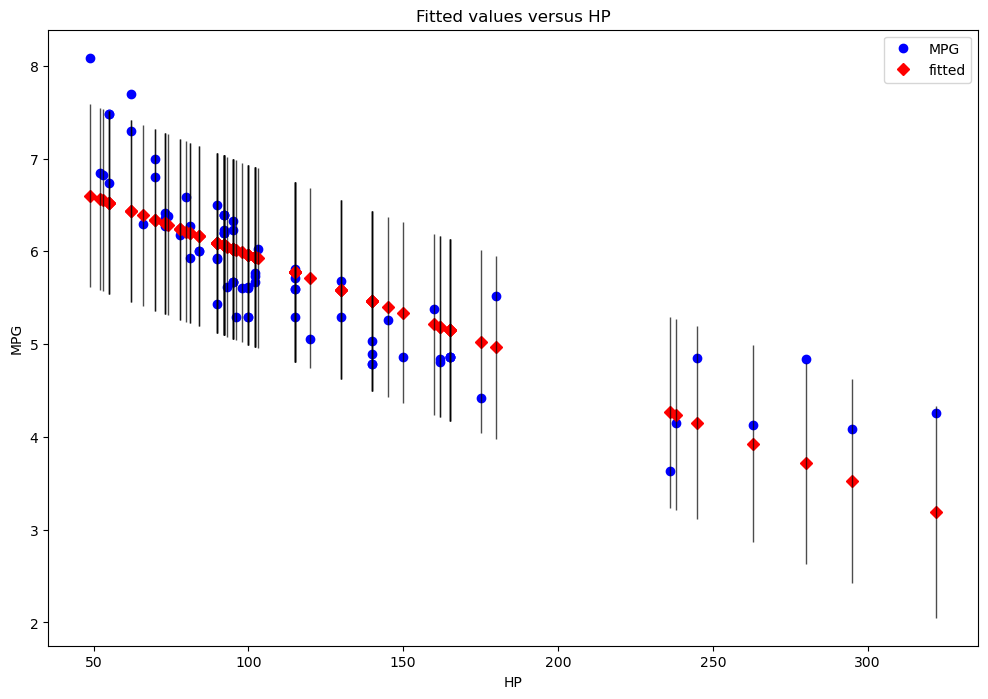

In [128]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, 1, ax=ax)
plt.show()

C:\Users\dskcy\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


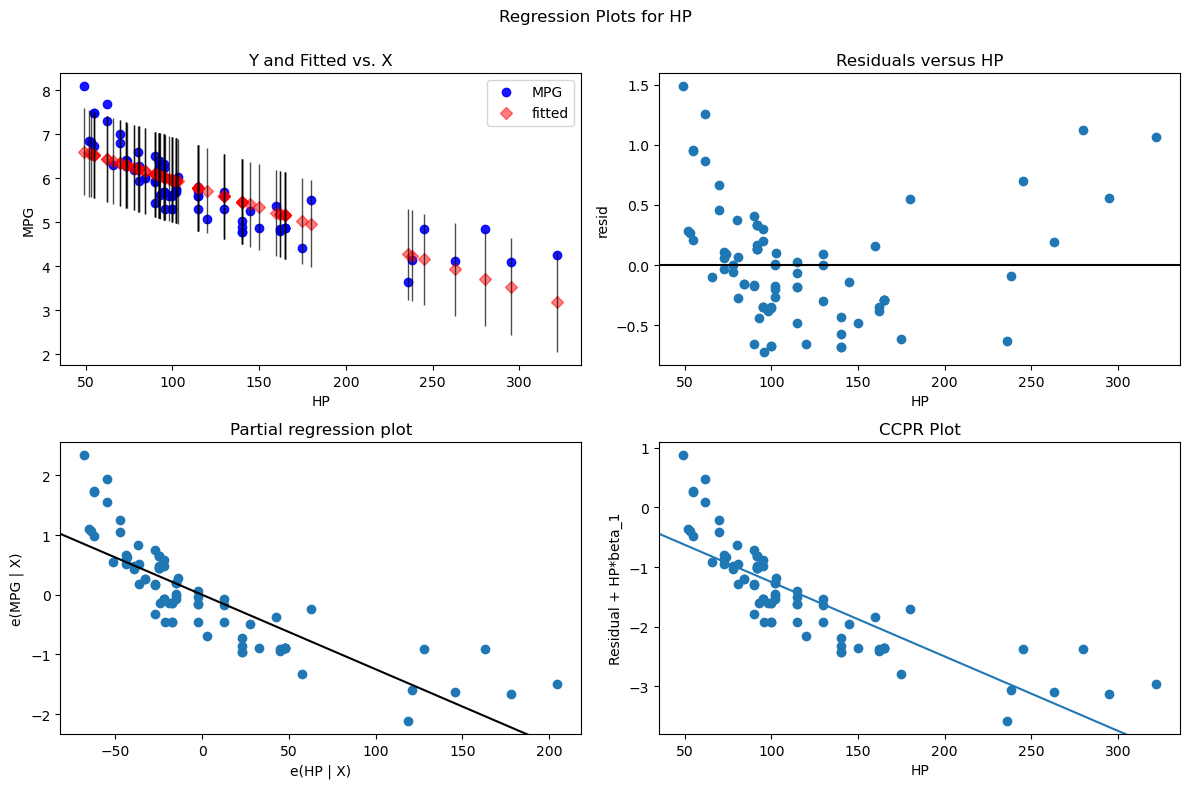

In [129]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'HP', fig=fig)

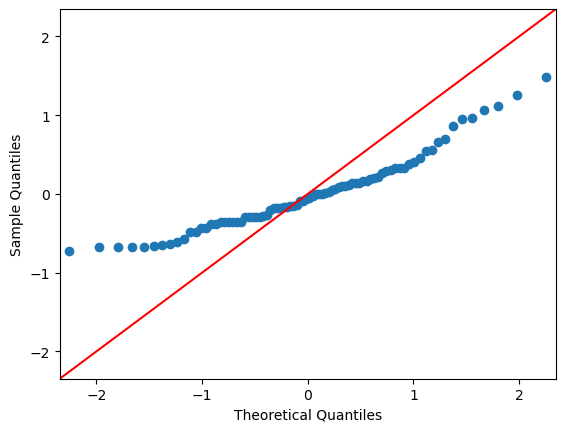

In [130]:
predictions = results.get_prediction(sm.add_constant(X)).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
residuals = Y - predictions['mean']
fig = sm.qqplot(residuals, line='45')

We need to know prediction intervals: `(obs_ci_lower, obs_ci_upper)` - They capture the `se` of both parameter and the residuals.